In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [2]:
# download the checkpoint demo
config_file = '../work_dirs/mask_rcnn/mask_rcnn.py'
checkpoint_file = '../work_dirs/mask_rcnn/epoch_12.pth'

In [3]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: ../work_dirs/mask_rcnn/epoch_12.pth


In [5]:
# test a single image
img = mmcv.imread( '../data/ic_bin/val/000000/rgb/000000.jpg', channel_order='rgb')
result = inference_detector(model, img)
print(result)

<DetDataSample(

    META INFORMATION
    pad_shape: (800, 1088)
    ori_shape: (480, 640)
    img_shape: (800, 1067)
    batch_input_shape: (800, 1088)
    img_path: None
    scale_factor: (1.6671875, 1.6666666666666667)
    img_id: 0

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            masks: BitmapMasks(num_masks=0, height=480, width=640)
        ) at 0x7f0dd51036a0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([0.9588, 0.9432, 0.9400, 0.8325, 0.8147, 0.7647, 0.7053, 0.6935, 0.5842,
                        0.4903, 0.4144, 0.3823, 0.3304, 0.2697, 0.2518, 0.2474, 0.1763, 0.1481,
                        0.1319, 0.1160, 0.1063, 0.1049, 0.1045, 0.1012, 0.1008, 0.1007, 0.0882,
                     

In [6]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

04/27 18:21:13 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


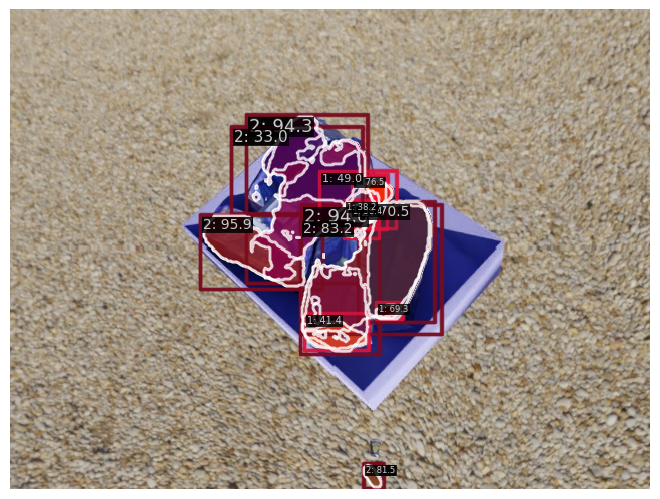

In [7]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()